In [ ]:
import pandas as pd
import numpy as np
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_json('/content/drive/MyDrive/Colab Notebooks/sample.json')

In [ ]:
df

,id,text
0,1,Ты нашёл их или нет?
1,2,Почему она так со мной поступает?
2,3,Никто туда больше не ходит.
3,4,У него с собой не было тогда денег.
4,5,Почему они с нами так поступают?
...,...,...
407,408,Рому было нечего сказать.
408,409,Том ещё нас не видел.
409,410,Мы должны всем им помочь.
410,411,Чего ты свой нос повсюду суёшь?


In [ ]:
df.shape

(412, 2)

###Найдём количество предложений в наших текстах

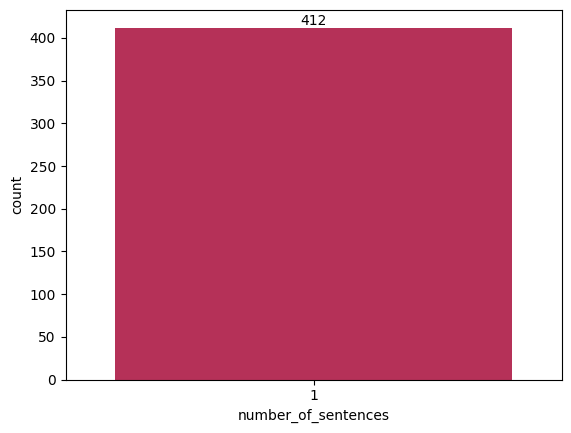

In [ ]:
def quantity(input):
    return input.count('.')+input.count('!')+input.count('?')
df['number_of_sentences']=df['text'].apply(quantity)
plot0=sns.countplot(df, x='number_of_sentences', palette='rocket')
for container in plot0.containers:
    plot0.bar_label(container)

###Найдём явные дубликаты

In [ ]:
def replace_e(input):
    return input.replace('ё', 'е')
df['text']=df['text'].apply(replace_e)
df_without_id=df.drop(columns=['id'], axis=1)
duplicateRows = df_without_id[df_without_id.duplicated()]

In [ ]:
duplicateRows

,text,number_of_sentences
313,Кто тебе это все сказал?,1


In [ ]:
df[df['text']=='Кто тебе это все сказал?']

,id,text,number_of_sentences
276,277,Кто тебе это все сказал?,1
313,314,Кто тебе это все сказал?,1


In [ ]:
df=df[df['id']!=314]

###Анализ датасета

In [ ]:
def count_digits(input):
    digit=0
    for i in input:
        if (i.isdigit()):
            digit+=1
    return digit
df['count_digits']=df['text'].apply(count_digits)

<ipython-input-10-c896bcc9bfc0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_digits']=df['text'].apply(count_digits)


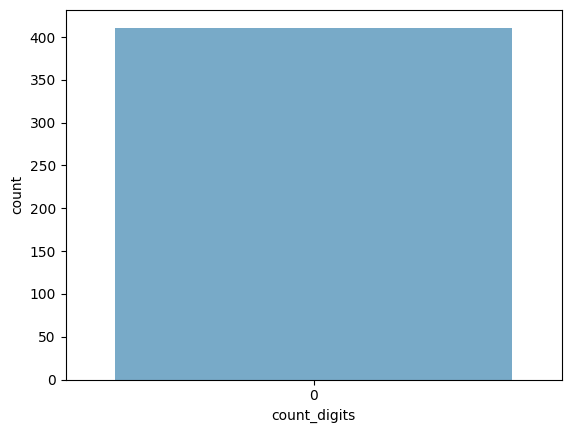

In [ ]:
plot_digits=sns.countplot(df, x='count_digits', palette='Blues')

In [ ]:
def count_the_number_of_letters(input):
    punct='''!"#$%&'()*+,./:;<=>?@[\]^_`{|}~'''
    for i in range(len(punct)):
        input=input.replace(punct[i], ' ')
    count=0
    for i in range(len(input)):
        if input[i].isalpha():
            count+=1
    return count

df['number_of_letters']=df['text'].apply(count_the_number_of_letters)

<ipython-input-18-6d4455f455a5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_of_letters']=df['text'].apply(count_the_number_of_letters)


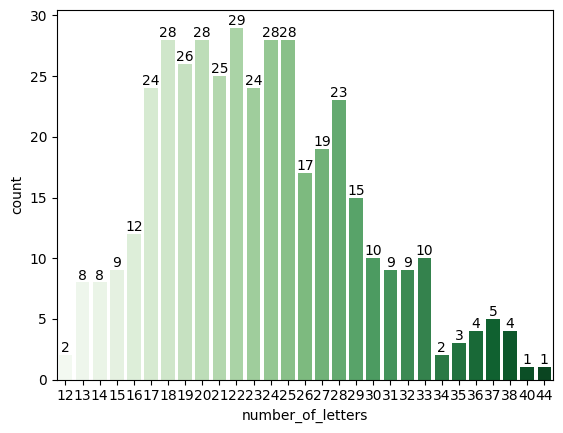

In [ ]:
plot_letters=sns.countplot(df, x='number_of_letters', palette='Greens')
for container in plot_letters.containers:
    plot_letters.bar_label(container)

In [ ]:
def length(input):
    punct='''!"#$%&'()*+,./:;<=>?@[\]^_`{|}~'''
    for i in range(len(punct)):
        input=input.replace(punct[i], ' ')
    return len(input.split())

df['Length']=df['text'].apply(length)

<ipython-input-20-2a0ff4d2b4e8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Length']=df['text'].apply(length)


In [ ]:
df

,id,text,number_of_sentences,count_digits,number_of_letters,Length
0,1,Ты нашел их или нет?,1,0,15,5
1,2,Почему она так со мной поступает?,1,0,27,6
2,3,Никто туда больше не ходит.,1,0,22,5
3,4,У него с собой не было тогда денег.,1,0,27,8
4,5,Почему они с нами так поступают?,1,0,26,6
...,...,...,...,...,...,...
407,408,Рому было нечего сказать.,1,0,21,4
408,409,Том еще нас не видел.,1,0,16,5
409,410,Мы должны всем им помочь.,1,0,20,5
410,411,Чего ты свой нос повсюду суешь?,1,0,25,6


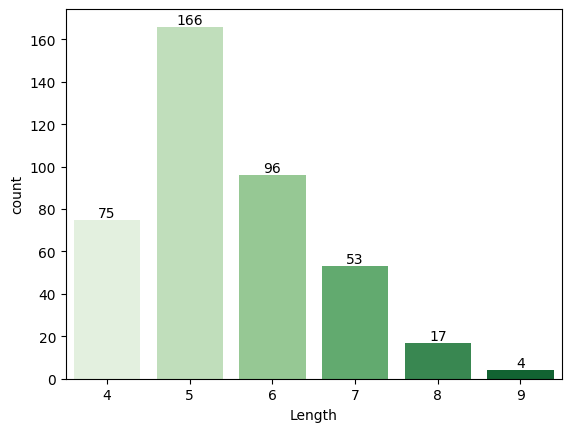

In [ ]:
plot1=sns.countplot(df, x='Length', palette='Greens')
for container in plot1.containers:
    plot1.bar_label(container)

<ipython-input-23-48290113ca38>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type_of_sentence']=df['text'].apply(type_of_sentence)


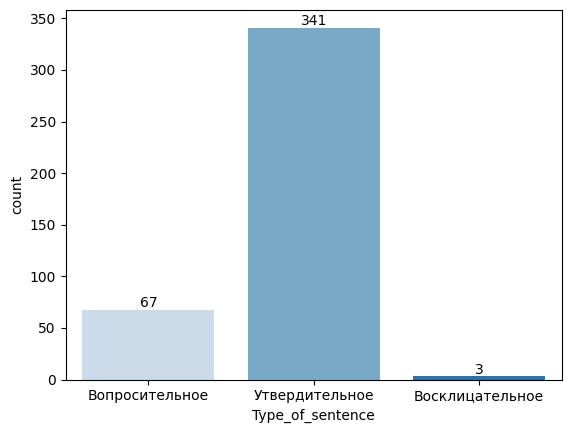

In [ ]:
def type_of_sentence(input):
    dict1={'.': 'Утвердительное', '?': 'Вопросительное', '!': 'Восклицательное'}
    return dict1[input[-1]]
df['Type_of_sentence']=df['text'].apply(type_of_sentence)
plot2=sns.countplot(df, x='Type_of_sentence', palette='Blues')
for container in plot2.containers:
    plot2.bar_label(container)

In [ ]:
df[df['Type_of_sentence']=='Восклицательное']

,id,text,number_of_sentences,count_digits,number_of_letters,Length,Type_of_sentence
227,228,"Хорошо, что Тома здесь нет!",1,0,21,5,Восклицательное
238,239,Я же тебя просил меня разбудить!,1,0,26,6,Восклицательное
250,251,Я же вас просил меня разбудить!,1,0,25,6,Восклицательное


In [ ]:
def wc_prep(input):
    punct='''!"#$%&'()*+,./:;<=>?@[\]^_`{|}~'''
    for i in range(len(punct)):
        input=input.replace(punct[i], ' ')
    output=(input.lower()).split()
    return ' '.join(output)
df['wc_text']=df['text'].apply(wc_prep)

<ipython-input-25-9ad7eb9793e7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wc_text']=df['text'].apply(wc_prep)


In [ ]:
df

,id,text,number_of_sentences,count_digits,number_of_letters,Length,Type_of_sentence,wc_text
0,1,Ты нашел их или нет?,1,0,15,5,Вопросительное,ты нашел их или нет
1,2,Почему она так со мной поступает?,1,0,27,6,Вопросительное,почему она так со мной поступает
2,3,Никто туда больше не ходит.,1,0,22,5,Утвердительное,никто туда больше не ходит
3,4,У него с собой не было тогда денег.,1,0,27,8,Утвердительное,у него с собой не было тогда денег
4,5,Почему они с нами так поступают?,1,0,26,6,Вопросительное,почему они с нами так поступают
...,...,...,...,...,...,...,...,...
407,408,Рому было нечего сказать.,1,0,21,4,Утвердительное,рому было нечего сказать
408,409,Том еще нас не видел.,1,0,16,5,Утвердительное,том еще нас не видел
409,410,Мы должны всем им помочь.,1,0,20,5,Утвердительное,мы должны всем им помочь
410,411,Чего ты свой нос повсюду суешь?,1,0,25,6,Вопросительное,чего ты свой нос повсюду суешь


(-0.5, 249.5, 249.5, -0.5)

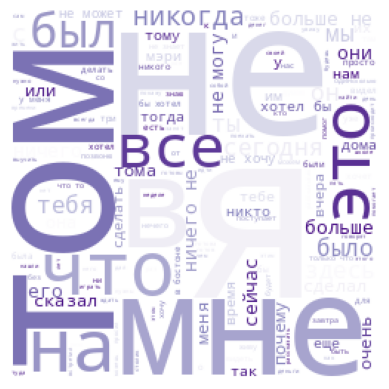

In [ ]:
WC_text=" ".join(df['wc_text'])
WC=WordCloud(width=250, height=250, background_color='white', colormap='Purples_r').generate(WC_text)
WC_image=WC.to_array()
plt.imshow(WC_image)
plt.axis('off')

In [ ]:
df['number_of_matching_words']=df['wc_text'].apply(lambda x: abs(len(x.split()) - len(set(x.split()))))

<ipython-input-28-32d082decf4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_of_matching_words']=df['wc_text'].apply(lambda x: abs(len(x.split()) - len(set(x.split()))))


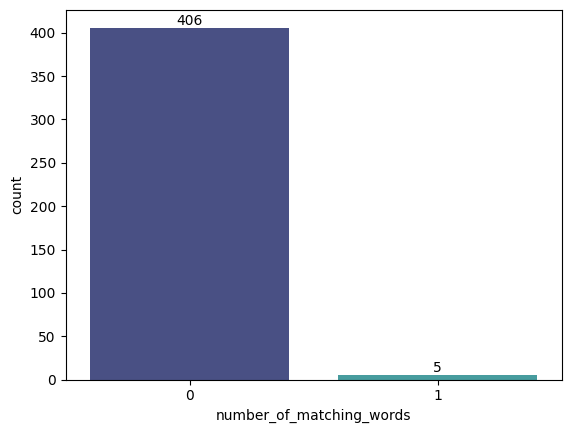

In [ ]:
plot3=sns.countplot(df, x='number_of_matching_words', palette='mako')
for container in plot3.containers:
    plot3.bar_label(container)

In [ ]:
df[df['number_of_matching_words']==1]

,id,text,number_of_sentences,count_digits,number_of_letters,Length,Type_of_sentence,wc_text,number_of_matching_words
166,167,Ты в футбол играешь или в регби?,1,0,25,7,Вопросительное,ты в футбол играешь или в регби,1
169,170,Ты едешь на поезде или на машине?,1,0,26,7,Вопросительное,ты едешь на поезде или на машине,1
223,224,Ты на поезде едешь или на машине?,1,0,26,7,Вопросительное,ты на поезде едешь или на машине,1
249,250,Многие птицы на зиму улетают на юг.,1,0,28,7,Утвердительное,многие птицы на зиму улетают на юг,1
393,394,Мост очень длинный и очень высокий.,1,0,29,6,Утвердительное,мост очень длинный и очень высокий,1


In [ ]:
df['number_of_commas_in_text']=df['text'].apply(lambda x: x.count(','))

<ipython-input-31-df2a41f6c2e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_of_commas_in_text']=df['text'].apply(lambda x: x.count(','))


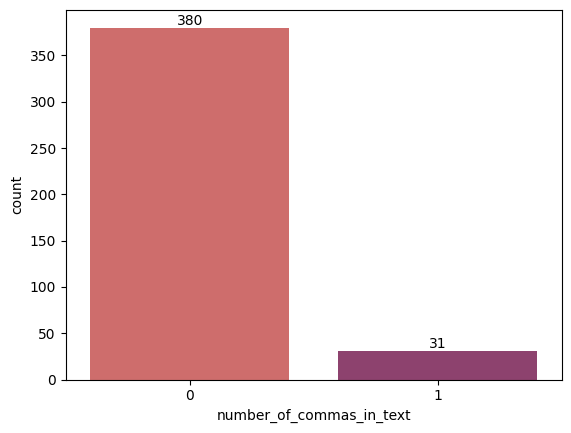

In [ ]:
plot4=sns.countplot(df, x='number_of_commas_in_text', palette='flare')
for container in plot4.containers:
    plot4.bar_label(container)

In [ ]:
df.describe()

,id,number_of_sentences,count_digits,number_of_letters,Length,number_of_matching_words,number_of_commas_in_text
count,411.000000,411.0,411.0,411.000000,411.000000,411.000000,411.000000
mean,206.238443,1.0,0.0,23.330900,5.472019,0.012165,0.075426
std,119.104982,0.0,0.0,5.767232,1.113584,0.109758,0.264399
min,1.000000,1.0,0.0,12.000000,4.000000,0.000000,0.000000
25%,103.500000,1.0,0.0,19.000000,5.000000,0.000000,0.000000
50%,206.000000,1.0,0.0,23.000000,5.000000,0.000000,0.000000
75%,308.500000,1.0,0.0,27.000000,6.000000,0.000000,0.000000
max,412.000000,1.0,0.0,44.000000,9.000000,1.000000,1.000000
